In [1]:
!rm eco.so

In [2]:
!make py

clang++ -O3 -undefined dynamic_lookup -shared -std=c++17 -fPIC `python -m pybind11 --includes` basic_tools.cpp classes.cpp ecosystem_bindings.cpp -o eco.so


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

import time
import sys
sys.path.insert(0, '/Users/JuanLuis/git/Ecosystems/pruebas_cpp/')
import eco
import copy

from IPython.display import HTML, display
import tabulate

In [4]:
start = time.time()
e = eco.Ecosystem()
e.initialize()
#e.create_new_organisms(eco.OrganismType.PLANT_A, 20);
#e.create_new_organisms(eco.OrganismType.PLANT_B, 20);
e.create_new_organisms(eco.OrganismType.HERBIVORE, 20);
e.create_new_organisms(eco.OrganismType.CARNIVORE, 20);
print("init time: {:.2f}ms".format(1000 * (time.time() - start)))

def strength_ph_cap(org_type):
    if org_type in [eco.OrganismType.PLANT_A, eco.OrganismType.PLANT_B]:
        return e.mean_of_attribute(eco.OrganismAttribute.PHOTOSYNTHESIS_CAPACITY, org_type)
    else:
        return e.mean_of_attribute(eco.OrganismAttribute.STRENGTH, org_type)

def make_row(org_type):
    # "SPECIES", "population", "energy", "strength/ph_cap"
    return [
        org_type,
        e.get_num_organisms_of_type(org_type),
        e.mean_of_attribute(eco.OrganismAttribute.ENERGY_RESERVE, org_type),
        strength_ph_cap(org_type)
    ]

init time: 128.83ms


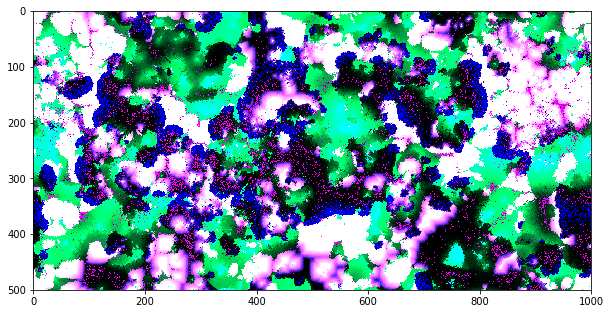

SPECIES,population,energy,strength/ph_cap
OrganismType.PLANT_A,212362,2927.15405273,100.0
OrganismType.PLANT_B,183711,4537.76611328,253.54359436
OrganismType.HERBIVORE,34618,2668.75390625,63.1667633057
OrganismType.CARNIVORE,21815,7886.84570312,16.8905792236


  1%|          | 9635/1000000 [50:50<88:39:00,  3.10it/s]

In [ ]:
num_iters = 1000000
num_organisms = []
periodic_plot = 50
import tqdm
#e.create_new_organisms(eco.OrganismType.PLANT_A, 100);
#e.create_new_organisms(eco.OrganismType.PLANT_B, 100);
#e.create_new_organisms(eco.OrganismType.HERBIVORE, 10000);
#e.create_new_organisms(eco.OrganismType.CARNIVORE, 10);
#print e.get_num_organisms(), "organisms created"

for i in tqdm.tqdm(range(num_iters)):
    
    start = time.time()
    try:
        e.evolve()
    except KeyboardInterrupt:
        break
    num_organisms.append(e.get_num_organisms())
     
    e.keep_number_of_organisms_above(eco.OrganismType.PLANT_A, 10)
    e.keep_number_of_organisms_above(eco.OrganismType.PLANT_B, 10)
    e.keep_number_of_organisms_above(eco.OrganismType.HERBIVORE, 10)
    e.keep_number_of_organisms_above(eco.OrganismType.CARNIVORE, 10)
 
    if i % periodic_plot == 0:        
        """
        m_sl = np.array(eco.Matrix(e,
                                  eco.BiotopeAttribute.SUN_LIGHT),
                     copy=False) * 10.0
        m_te = np.array(eco.Matrix(e,
                                  eco.BiotopeAttribute.TEMPERATURE),
                     copy=False) * 10.0
        """
        m_aa = np.array(eco.Matrix(e,
                                  eco.OrganismAttribute.ENERGY_RESERVE,
                                  eco.OrganismType.PLANT_A),
                     copy=False) * 10.0
        m_ab = np.array(eco.Matrix(e,
                                  eco.OrganismAttribute.ENERGY_RESERVE,
                                  eco.OrganismType.PLANT_B),
                     copy=False)
        m_a = m_aa + m_ab * 10.0
        m_b = np.array(eco.Matrix(e,
                                  eco.OrganismAttribute.ENERGY_RESERVE,
                                  eco.OrganismType.HERBIVORE),
                     copy=False)
        m_c = np.array(eco.Matrix(e,
                                  eco.OrganismAttribute.ENERGY_RESERVE,
                                  eco.OrganismType.CARNIVORE),
                     copy=False)
                
        m_c += m_ab
        m_b += m_c + m_aa * 0.007
        #m_b += m_ab
        image = np.zeros((m_a.shape[1], m_a.shape[0], 3))
        image[:, :, 0] = m_c.T / 1500.0 #+ m_te.T / 2000.0 # r
        image[:, :, 1] = m_a.T / 35000.0 #+ m_sl.T / 1000.0 # g
        image[:, :, 2] = m_b.T / 600.0 #+ m_sl.T / 1000.0 # b
        plt.figure(figsize=(10, 10))
        plt.imshow(image[:, :, :], interpolation='None', vmin=0.0, vmax=1.0)
        #if i % (10 * periodic_plot) == 0:
        #    plt.figure()
        #    plt.plot(num_organisms, 'b')
        #    plt.grid()
        #    plt.xlabel('Cycle')
        #    plt.ylabel('Num organisms')
        #    plt.show()       
        clear_output(wait=True)
        plt.show()
        
        table = [
            ["SPECIES", "population", "energy", "strength/ph_cap"],
            make_row(eco.OrganismType.PLANT_A),
            make_row(eco.OrganismType.PLANT_B),
            make_row(eco.OrganismType.HERBIVORE),
            make_row(eco.OrganismType.CARNIVORE)
        ]
        display(HTML(tabulate.tabulate(table, tablefmt='html')))
        #print e.get_num_organisms()
       

In [ ]:
#!pip install tqdm

In [ ]:
#m_sl

In [ ]:
#!pip install tabulate

In [ ]:

table = [["Sun",696000,1989100000],
         ["Earth",6371,5973.6],
         ["Moon",1737,73.5],
         ["Mars",3390,641.85]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))